In [2]:
# add VT_SNN directory
import sys, os
CURRENT_TEST_DIR = os.getcwd()
sys.path.append(CURRENT_TEST_DIR + "/../../VT_SNN/")

from dataset import ViTacMMDataset
import slayerSNN as snn
import numpy as np
from IPython.display import HTML
import torch
from pathlib import Path

In [3]:
# please indicate data dir
data_dir = '/home/tasbolat/some_python_examples/data_VT_SNN_new/'
train_dataset = torch.load(Path(data_dir) / "ds_vis.pt")

In [5]:
def get_data(num):
    # this function outputs input tactile, vision and downsampled vision data
    vis = torch.FloatTensor(np.load(Path(data_dir) / f'{num:d}_vis.npy'))
    tac = torch.FloatTensor(np.load(Path(data_dir) / f'{num:d}_tact.npy'))
    return tac, vis, train_dataset[num]

In [6]:
tac, vis, ds_vis = get_data(0)
tac.shape, vis.shape, ds_vis.shape

(torch.Size([78, 2, 325]),
 torch.Size([2, 250, 200, 325]),
 torch.Size([2, 63, 50, 325]))

In [7]:
# get labels
a = np.loadtxt('../../data_VT_SNN_new/train_80_20_1.txt').astype(int)
b = np.loadtxt('../../data_VT_SNN_new/test_80_20_1.txt').astype(int)
all_labels = np.concatenate([a,b])
ind_sorted = np.argsort(all_labels[:,0])
all_labels = all_labels[ind_sorted]

In [8]:
# read created time based labels
start_end_dir = '/datasets/eventdata/batch2/traj_start_ends/'
some_order = os.listdir(start_end_dir)

start_time_holder = list()
for i in some_order:
	#print(i)
	load_file = np.loadtxt(start_end_dir+'/'+i)
	start_time_holder.append(load_file[0])
    
argsorted = np.argsort(np.array(start_time_holder))

In [9]:
for i in range(len(argsorted)):
	#if some_order[argsorted[i]][0:-12] == "107-a_pepsi_bottle":
	print(some_order[argsorted[i]])

109-a_soymilk_01.startend
109-a_soymilk_02.startend
109-a_soymilk_03.startend
109-a_soymilk_04.startend
109-a_soymilk_05.startend
109-a_soymilk_06.startend
109-a_soymilk_07.startend
109-a_soymilk_08.startend
109-a_soymilk_09.startend
109-a_soymilk_10.startend
109-a_soymilk_11.startend
109-a_soymilk_12.startend
109-a_soymilk_13.startend
109-a_soymilk_14.startend
109-a_soymilk_15.startend
109-a_soymilk_16.startend
109-a_soymilk_17.startend
109-a_soymilk_18.startend
109-a_soymilk_19.startend
109-a_soymilk_20.startend
109-b_soymilk_01.startend
109-b_soymilk_02.startend
109-b_soymilk_03.startend
109-b_soymilk_04.startend
109-b_soymilk_05.startend
109-b_soymilk_06.startend
109-b_soymilk_07.startend
109-b_soymilk_08.startend
109-b_soymilk_09.startend
109-b_soymilk_10.startend
109-b_soymilk_11.startend
109-b_soymilk_12.startend
109-b_soymilk_13.startend
109-b_soymilk_14.startend
109-b_soymilk_15.startend
109-b_soymilk_16.startend
109-b_soymilk_17.startend
109-b_soymilk_18.startend
109-b_soymil

In [11]:
model.load_state_dict(torch.load(PATH))
model.eval()list_of_objects2 = [
    "107-a_pepsi_bottle",
    "107-b_pepsi_bottle",
    "107-c_pepsi_bottle",
    "107-d_pepsi_bottle",
    "107-e_pepsi_bottle",
    "108-a_tuna_fish_can",
    "108-b_tuna_fish_can",
    "108-c_tuna_fish_can",
    "108-d_tuna_fish_can",
    "108-e_tuna_fish_can",
    "109-a_soymilk",
    "109-b_soymilk",
    "109-c_soymilk",
    "109-d_soymilk",
    "109-e_soymilk",
    "110-a_coffee_can",
    "110-b_coffee_can",
    "110-c_coffee_can",
    "110-d_coffee_can",
    "110-e_coffee_can",
]

In [12]:
# create labels
labels = []
current_label = -1
overall_count = -1model.load_state_dict(torch.load(PATH))
model.eval()
for obj in list_of_objects2:
    current_label += 1
    for i in range(1, 21):
        overall_count += 1
        _obj_name = f"{obj}_{i:02}"
        labels.append([_obj_name, overall_count, current_label])

In [13]:
def get_info(_obj_name):
    for i in range(len(labels)):
        if _obj_name == labels[i][0]:
            return labels[i][1], labels[i][2]

In [14]:
outliers = np.loadtxt('filenames_outliers.txt', dtype=str)

tensor(329.)

In [77]:
#columns={'filename', 'object', 'id', 'label', 'pos_count', 'neg_count'}

info_list = {'filename':[], 'object':[], 'weight':[], 'id':[], 'label':[],
             'pos_count':[], 'neg_count':[], 'total_count':[], 'unique_pixels':[]}
obj_list = ['pepsi', 'tuna', 'soy', 'coffee']

for i in range(len(argsorted)):
    cool = True
    for outlier in outliers:
        if outlier in some_order[argsorted[i]]:
            cool = False
            
    if cool:
        for j in range(len(list_of_objects2)):
            if list_of_objects2[j] in some_order[argsorted[i]]:
                _num, _label = get_info(some_order[argsorted[i]][:-9])
                init_vis_data = train_dataset[_num][..., :25]
                pos = torch.sum(init_vis_data[0]).item()
                neg = torch.sum(init_vis_data[1]).item()

                for _obj in obj_list:
                    if _obj in some_order[argsorted[i]][:-9]:
                        break
                        
                _weight = 0        
                if '-b_' in some_order[argsorted[i]][:-9]:
                    _weight = 25
                elif '-c_' in some_order[argsorted[i]][:-9]:
                    _weight = 50
                elif '-d_' in some_order[argsorted[i]][:-9]:
                    _weight = 75
                elif '-e_' in some_order[argsorted[i]][:-9]:
                    _weight = 100
                        
                info_list['filename'].append(some_order[argsorted[i]][:-9])
                info_list['object'].append(_obj)
                info_list['weight'].append(_weight)
                info_list['id'].append(_num)
                info_list['label'].append(_label)
                info_list['pos_count'].append(pos)
                info_list['neg_count'].append(neg)
                info_list['total_count'].append(pos+neg)
                a = init_vis_data
                b = torch.sum(torch.sum(a,dim=0),dim=2)
                b[b>0]=1
                info_list['unique_pixels'].append(torch.sum(b).item())

                #info_list.append([some_order[argsorted[i]][:-9], _obj, _num, _label, pos, neg])

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import accuracy_score

In [79]:
df = pd.DataFrame(info_list)

In [80]:
df = df.sort_values(by=['weight', 'object'])

In [81]:
df[df.object=='pepsi']

,filename,object,weight,id,label,pos_count,neg_count,total_count,unique_pixels
150,107-a_pepsi_bottle_03,pepsi,0,2,0,1416.0,994.0,2410.0,427.0
151,107-a_pepsi_bottle_04,pepsi,0,3,0,1333.0,938.0,2271.0,403.0
152,107-a_pepsi_bottle_05,pepsi,0,4,0,1388.0,938.0,2326.0,414.0
153,107-a_pepsi_bottle_06,pepsi,0,5,0,1822.0,863.0,2685.0,391.0
154,107-a_pepsi_bottle_07,pepsi,0,6,0,1332.0,928.0,2260.0,407.0
...,...,...,...,...,...,...,...,...,...
220,107-e_pepsi_bottle_16,pepsi,100,95,4,2053.0,1070.0,3123.0,446.0
221,107-e_pepsi_bottle_17,pepsi,100,96,4,1344.0,956.0,2300.0,411.0
222,107-e_pepsi_bottle_18,pepsi,100,97,4,893.0,866.0,1759.0,391.0
223,107-e_pepsi_bottle_19,pepsi,100,98,4,937.0,780.0,1717.0,391.0


In [82]:
np.arange(15,25,1)

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(15,)
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
(15,)
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
(15,)
[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
(15,)
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
(15,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(15,)
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
(15,)
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
(15,)
[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
(15,)
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
(15,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(15,)
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
(15,)
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
(15,)
[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
(15,)
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
(15,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(15,)
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
(15,)
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
(15,)
[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]

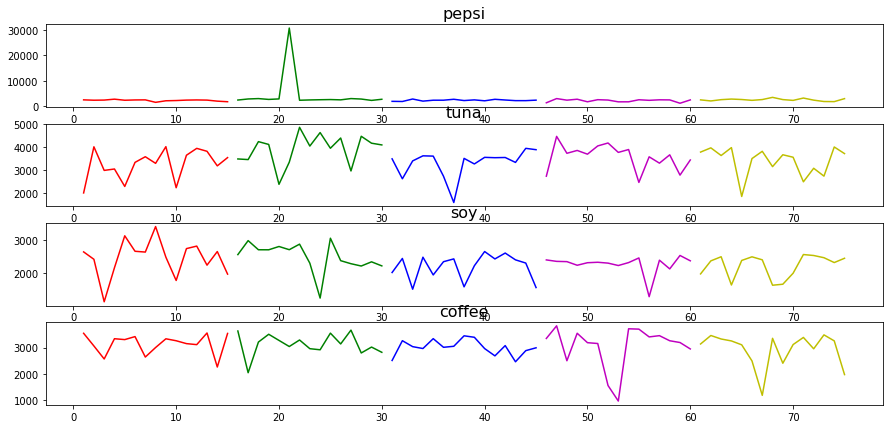

In [83]:
fig, ax = plt.subplots(4, figsize=(15,7))
obj = 'tuna'
cs = ['r', 'g', 'b', 'm', 'y']
ws = [0,25,50,75,100]
for j in range(len(obj_list)):
    for i in range(len(ws)):
        ax[j].set_title(obj_list[j], fontsize=16)
        print(np.arange(15*int(ws[i]/25),int(15*ws[i]/25)+15, 1))
        print(df[(df.object==obj_list[j]) & (df.weight==ws[i])].total_count.values.shape)
        ax[j].plot(np.arange(15*int(ws[i]/25)+1,int(15*ws[i]/25)+16, 1), df[(df.object==obj_list[j]) & (df.weight==ws[i])].total_count.values, cs[i])
plt.show()

In [84]:
for i in range(len(argsorted)):
    print(some_order[argsorted[i]])

109-a_soymilk_01.startend
109-a_soymilk_02.startend
109-a_soymilk_03.startend
109-a_soymilk_04.startend
109-a_soymilk_05.startend
109-a_soymilk_06.startend
109-a_soymilk_07.startend
109-a_soymilk_08.startend
109-a_soymilk_09.startend
109-a_soymilk_10.startend
109-a_soymilk_11.startend
109-a_soymilk_12.startend
109-a_soymilk_13.startend
109-a_soymilk_14.startend
109-a_soymilk_15.startend
109-a_soymilk_16.startend
109-a_soymilk_17.startend
109-a_soymilk_18.startend
109-a_soymilk_19.startend
109-a_soymilk_20.startend
109-b_soymilk_01.startend
109-b_soymilk_02.startend
109-b_soymilk_03.startend
109-b_soymilk_04.startend
109-b_soymilk_05.startend
109-b_soymilk_06.startend
109-b_soymilk_07.startend
109-b_soymilk_08.startend
109-b_soymilk_09.startend
109-b_soymilk_10.startend
109-b_soymilk_11.startend
109-b_soymilk_12.startend
109-b_soymilk_13.startend
109-b_soymilk_14.startend
109-b_soymilk_15.startend
109-b_soymilk_16.startend
109-b_soymilk_17.startend
109-b_soymilk_18.startend
109-b_soymil

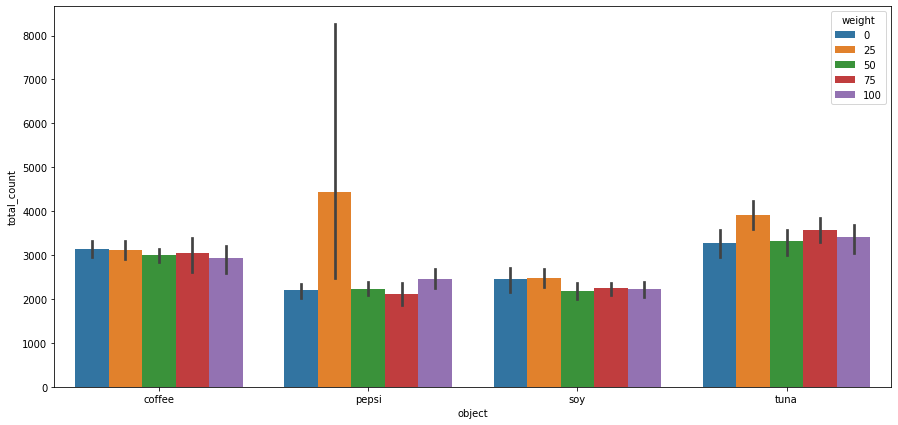

In [85]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sn.barplot(x="object", y="total_count", hue="weight", data=df)

In [86]:
custom_order = {
    25:0,
    75:1,
    50:2,
    0:3,
    100:4
}

In [87]:
df_new = df[df.object=='tuna'].copy().reset_index()
df_new = df_new.iloc[df_new['weight'].map(custom_order).argsort()]

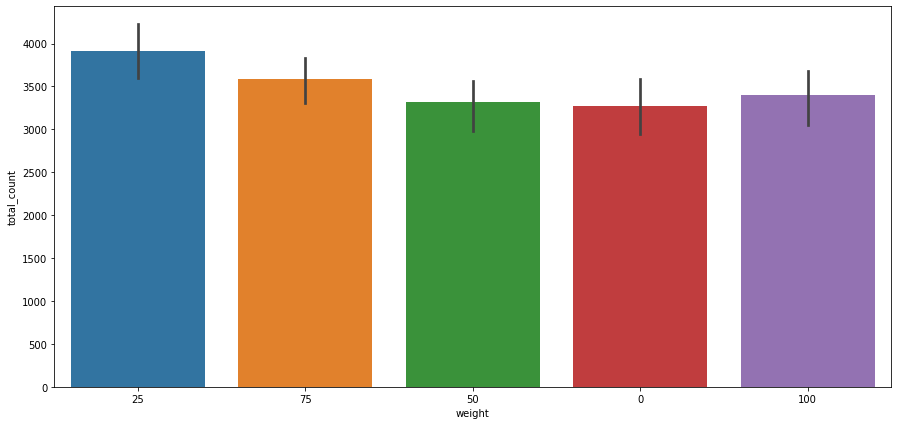

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sn.barplot(x="weight", y="total_count", data=df_new, order=custom_order)
plt.savefig('tuna_spike_count_init.png')

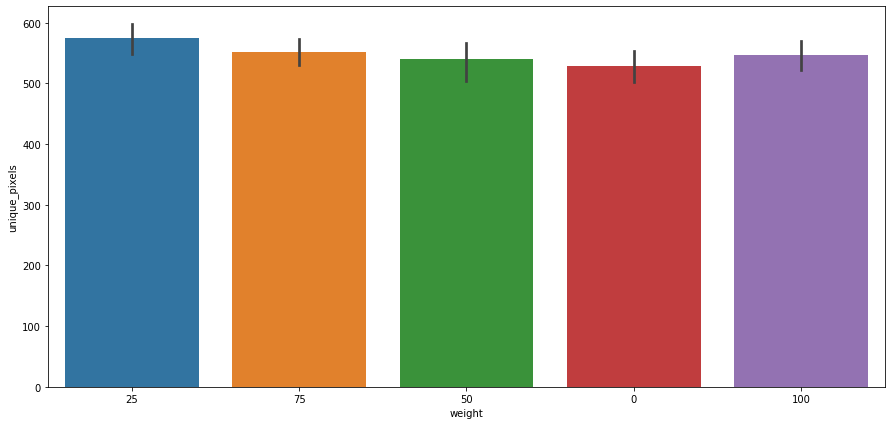

In [91]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sn.barplot(x="weight", y="unique_pixels", data=df_new, order=custom_order)
plt.savefig('tuna_unique_pixels_init.png')

### confusion matrix

In [72]:
import sys, os
CURRENT_TEST_DIR = os.getcwd()
sys.path.append(CURRENT_TEST_DIR + "/../../VT_SNN/")

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from snn_models.baseline_snn import SlayerMLP
from snn_models.multimodal_snn import SlayerMM
from dataset import ViTacDataset, ViTacMMDataset
from torch.utils.data import DataLoader
import slayerSNN as snn

In [74]:
params = {
    "neuron": {
        "type": "SRMALPHA",
        "theta": 10, # activation threshold
        "tauSr": 10.0, # time constant for srm kernel
        "tauRef": 1.0, # refractory kernel time constant
        "scaleRef": 2, # refractory kernel constant relative to theta
        "tauRho": 1, # pdf
        "scaleRho": 1, # membrane potential 
    },
    "simulation": {"Ts": 1.0, "tSample": 325, "nSample": 1},
}
device = torch.device("cuda:2")
net = SlayerMLP(params, (50, 63, 2), 32, 20).to(device)

In [75]:
path_to_model = '/home/tasbolat/tas_python_env/.guild/runs/ac54c3cfc0884eeebd3ddbbdf81d5b50/vis_weights_500_01.pt'
net.load_state_dict(torch.load(path_to_model))

<All keys matched successfully>

In [61]:
test_dataset = ViTacMMDataset(
    path=data_dir, sample_file=f"test_80_20_1.txt", output_size=20
)
test_loader = DataLoader(
    dataset=test_dataset, batch_size=80, shuffle=False, ax = sns.barplot(x="day", y="total_bill", data=tips)num_workers=4
)

Accuracy on testing set: 0.4666666666666667


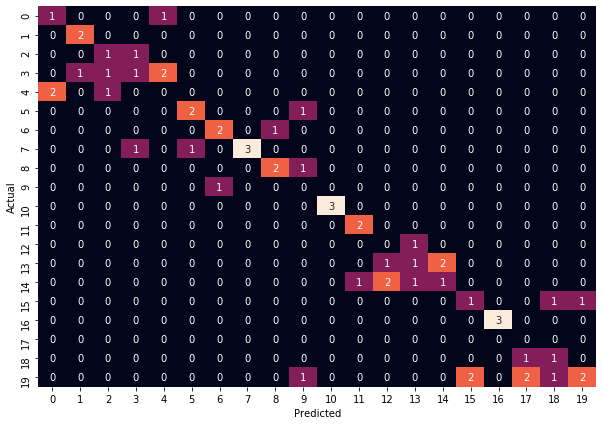

In [64]:
count = 0
total_testing_true=None
testing_true = torch.zeros([len(test_dataset),2])
ll = []
for i, (_, vis, target, label) in enumerate(test_loader, 0):
    testing_true[count:count+label.shape[0],0] = label
    with torch.no_grad():
        # Forward pass of the network.
        vis = vis.to(device)
        out = net.forward(vis)
        predicted_label = snn.predict.getClass(out[...,:25])
        testing_true[count:count+label.shape[0],1] = predicted_label
    count += label.shape[0]
    ll.append(label)
if total_testing_true is None:
    total_testing_true = testing_true
else:
    total_testing_true = torch.cat([total_testing_true, testing_true])
cm = confusion_matrix(testing_true[:,0].numpy(), testing_true[:,1].numpy()).T

print('Accuracy on testing set:', accuracy_score(testing_true[:,0].numpy(), testing_true[:,1].numpy()))

plt.figure(figsize = (10,7))
plt.tight_layout(True)ax = sns.barplot(x="day", y="total_bill", data=tips)
sn.heatmap(cm, annot=True, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig(f"{save_dir}/{run.id}_test.png")
plt.show()



In [67]:
# batch2
list_of_objects3 = [
    "Pepsi 0",
    "Pepsi 25",
    "Pepsi 50",
    "Pepsi 75",
    "Pepsi 100",
    "Tuna 0",
    "Tuna 25",
    "Tuna 50",
    "Tuna 75",
    "Tuna 100",
    "Soy 0",
    "Soy 25",
    "Soy 50",
    "Soy 75",
    "Soy 100",
    "Coffee 0",
    "Coffee 25",
    "Coffee 50",
    "Coffee 75",
    "Coffee 100",
]


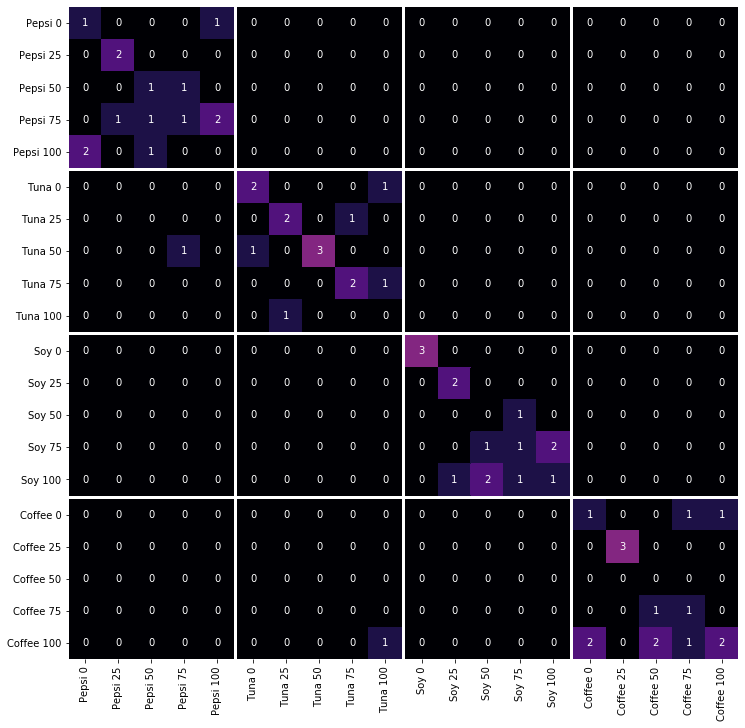

In [89]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(12,12))

for i in range(0,20,5):
    for j in range(0,20,5):
        if i == 15:
            xticklabels = list_of_objects3[j:j+5]
        else:
            xticklabels = False
        if j == 0:
            yticklabels = list_of_objects3[i:i+5]
        else:
            yticklabels = False
            
        sn.heatmap(cm[i:i+5,j:j+5], annot=True, cbar=False,
                   ax=ax[int(i/5)][int(j/5)], vmin=0, vmax=8,
                  xticklabels=xticklabels, yticklabels=yticklabels, cmap='magma')
plt.subplots_adjust(hspace=0.02, wspace=0.02)
plt.savefig('confusion_matrix_by_blocks.png')
plt.show()